## Dataset Description
Source: https://archive.ics.uci.edu/dataset/121/eeg+database. 
The dataset contains EEG measurements from 64 electrodes placed on the scalps of subjects. The sampling rate is 256 Hz, with each epoch lasting for 3.9 milliseconds. The dataset consists of two groups of subjects: alcoholic and control, and each subject was exposed to either a single stimulus (S1) or two stimuli (S1 and S2) in matched or non-matched conditions. Dataset has 3 versions: small, large and full.

In [1]:
import pandas as pd
import os
import tarfile

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
import gzip
import shutil

## Data Preparation

### Loading the dataset
The small dataset: 2 subjects, 10 runs for 3 paradigms

In [5]:
file_path = "/Users/deyachatterjee/Desktop/eeg+database/smni_eeg_data"

In [4]:
tar_files = [file for file in os.listdir(file_path) if file.endswith('.tar.gz')]

for tar_file in tar_files:
    full_path = os.path.join(file_path, tar_file)
    with tarfile.open(full_path, "r:gz") as tar:
        tar.extractall(path=file_path)


In [5]:
for tar_file in tar_files:
    full_path = os.path.join(file_path, tar_file)
    os.remove(full_path)

In [6]:
subfolders = [folder for folder in os.listdir(file_path) if os.path.isdir(os.path.join(file_path, folder))]
for subfolder in subfolders:
    folder_path = os.path.join(file_path, subfolder)
    gz_files = [file for file in os.listdir(folder_path) if file.endswith('.gz')]

    for gz_file in gz_files:
        full_path = os.path.join(folder_path, gz_file)
        output_file = os.path.splitext(full_path)[0]  
        with gzip.open(full_path, 'rb') as f_in:
            with open(output_file, 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)        
        os.remove(full_path)      

#### EDA for alcoholic subject 364

In [7]:
#collating 10 trial run data for alcoholic subject for 1st paradigm or S1 stimulus

folder_path = "/Users/deyachatterjee/Desktop/eeg+database/smni_eeg_data/a_1_co2a0000364"
rd_files = [file for file in os.listdir(folder_path) if file.startswith('co2a0000364.rd.')]
data = []
for rd_file in rd_files:
    full_path = os.path.join(folder_path, rd_file)
    with open(full_path, 'r') as f:
        lines = f.readlines()
        data.extend([line.strip().split() for line in lines if not line.startswith('#') and line.strip()])

columns = ['Trial', 'Sensor', 'Sample', 'Sensor_Value']
sdf = pd.DataFrame(data, columns=columns)
numeric_cols = ['Trial', 'Sample', 'Sensor_Value']
sdf[numeric_cols] = sdf[numeric_cols].apply(pd.to_numeric)

print(sdf.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163840 entries, 0 to 163839
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Trial         163840 non-null  int64  
 1   Sensor        163840 non-null  object 
 2   Sample        163840 non-null  int64  
 3   Sensor_Value  163840 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 5.0+ MB
None


In [8]:
sdf.head()

,Trial,Sensor,Sample,Sensor_Value
0,12,FP1,0,3.052
1,12,FP1,1,4.517
2,12,FP1,2,4.028
3,12,FP1,3,4.028
4,12,FP1,4,4.517


In [36]:
ut=sdf['Trial'].unique()
ut

array([12, 24, 22, 14,  0, 20, 18, 28, 10,  2])

In [11]:
len(sdf['Sensor'].unique())       

64

This indicates 64 channels or 64 types of sensors that collect the EEG data

In [14]:
#encoding Sensor type to numerical values for ease of plotting
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
sdf['Sensor'] = label_encoder.fit_transform(sdf['Sensor'])

In [15]:
sdf.head()

,Trial,Sensor,Sample,Sensor_Value
0,12,34,0,3.052
1,12,34,1,4.517
2,12,34,2,4.028
3,12,34,3,4.028
4,12,34,4,4.517


In [16]:
sdf['Sensor'].unique()

array([34, 35, 25, 26,  0,  1, 39, 22, 21, 32, 31, 28, 27, 58, 57, 18,  7,
        8, 15, 16, 11, 12, 45, 46, 56, 50, 49, 52, 51, 41, 40, 61,  2,  3,
       23, 24, 37, 38, 36, 30, 29, 10,  9, 20, 19, 60, 59,  4, 13, 14, 47,
       48,  5,  6, 53, 54, 33, 55, 42, 44, 43, 17, 63, 62])

#### EDA for control subject 337

In [27]:
folder_path = "/Users/deyachatterjee/Desktop/eeg+database/smni_eeg_data/c_1_co2c0000337"
rd_files = [file for file in os.listdir(folder_path) if file.startswith('co2c0000337.rd.')]
data = []
for rd_file in rd_files:
    full_path = os.path.join(folder_path, rd_file)
    with open(full_path, 'r') as f:
        lines = f.readlines()
        data.extend([line.strip().split() for line in lines if not line.startswith('#') and line.strip()])

columns = ['Trial', 'Sensor', 'Sample', 'Sensor_Value']
cdf = pd.DataFrame(data, columns=columns)
numeric_cols = ['Trial', 'Sample', 'Sensor_Value']
cdf[numeric_cols] = cdf[numeric_cols].apply(pd.to_numeric)

print(cdf.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163840 entries, 0 to 163839
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Trial         163840 non-null  int64  
 1   Sensor        163840 non-null  object 
 2   Sample        163840 non-null  int64  
 3   Sensor_Value  163840 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 5.0+ MB
None


In [28]:
cdf.head()

,Trial,Sensor,Sample,Sensor_Value
0,16,FP1,0,-6.755
1,16,FP1,1,-6.266
2,16,FP1,2,-6.755
3,16,FP1,3,-6.755
4,16,FP1,4,-4.801


In [40]:
ut=cdf['Trial'].unique()
ut

array([16, 26, 28, 32,  2, 34, 24, 36,  0, 30])

In [30]:
len(cdf['Sensor'].unique()) 

64

In [31]:
#encoding Sensor type to numerical values for ease of plotting
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
cdf['Sensor'] = label_encoder.fit_transform(cdf['Sensor'])

In [32]:
cdf.head()

,Trial,Sensor,Sample,Sensor_Value
0,16,34,0,-6.755
1,16,34,1,-6.266
2,16,34,2,-6.755
3,16,34,3,-6.755
4,16,34,4,-4.801


### Data visualization via plots

#### Alcoholic subject

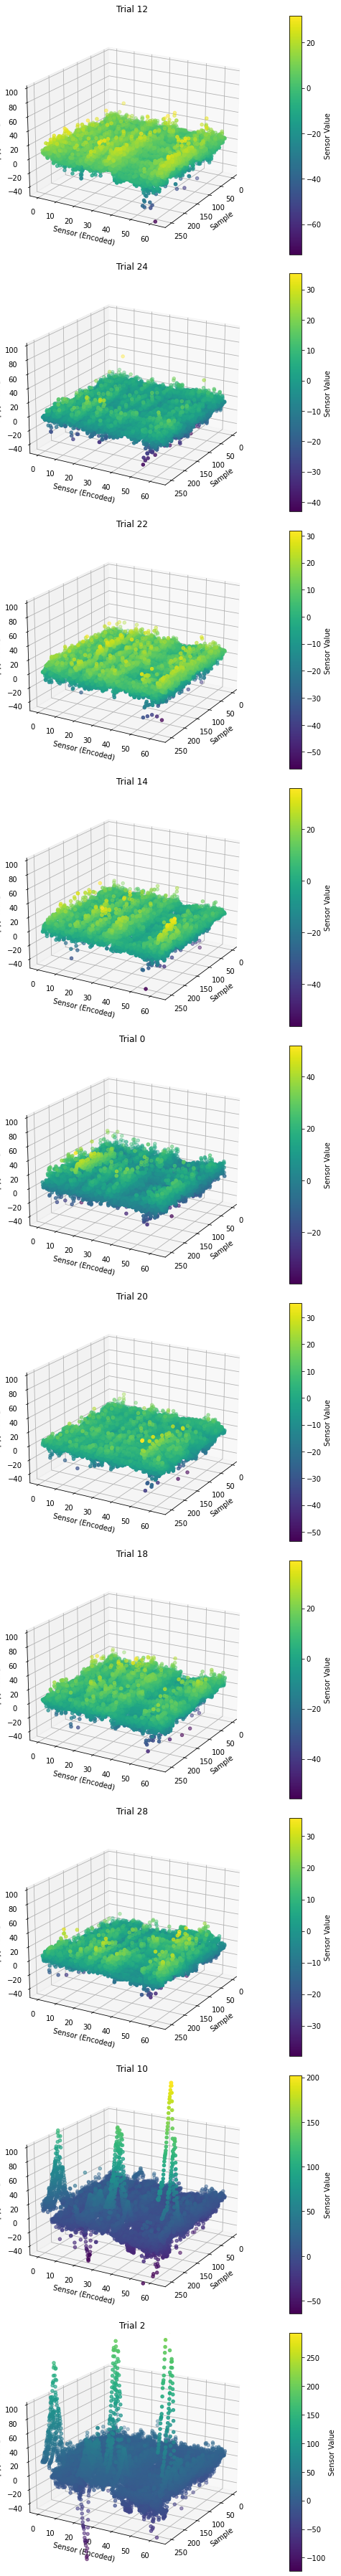

In [39]:
fig, axes = plt.subplots(nrows=len(ut), figsize=(15, 5*len(ut)), subplot_kw={'projection': '3d'})
for i, trial in enumerate(ut):
    trial_data = sdf[sdf['Trial'] == trial]
    ax = axes[i]
    ax.scatter(trial_data['Sample'], trial_data['Sensor'], trial_data['Sensor_Value'], c=trial_data['Sensor_Value'], cmap='viridis', marker='o')
    ax.set_xlabel('Sample')
    ax.set_ylabel('Sensor (Encoded)')
    ax.set_zlabel('Sensor Value')
    ax.set_title(f'Trial {trial}')
    cbar = plt.colorbar(ax.collections[-1], ax=ax)
    cbar.set_label('Sensor Value')
    ax.view_init(elev=20, azim=30)
    z_min = -50
    z_max = 100
    ax.set_zlim(z_min, z_max)
plt.tight_layout()
plt.show()

We can see the data is spiking at various regions. We can see some unusual spikes for Trial 10 and Trial 2 for some channels for the alcoholic subject 364. I set the scale for z-axis from -50 to 100, to ensure the scale is same and the comparision to the control subject is visually evident, as alcoholic subject has higher range of values for the EEG signal.

#### Control Subject

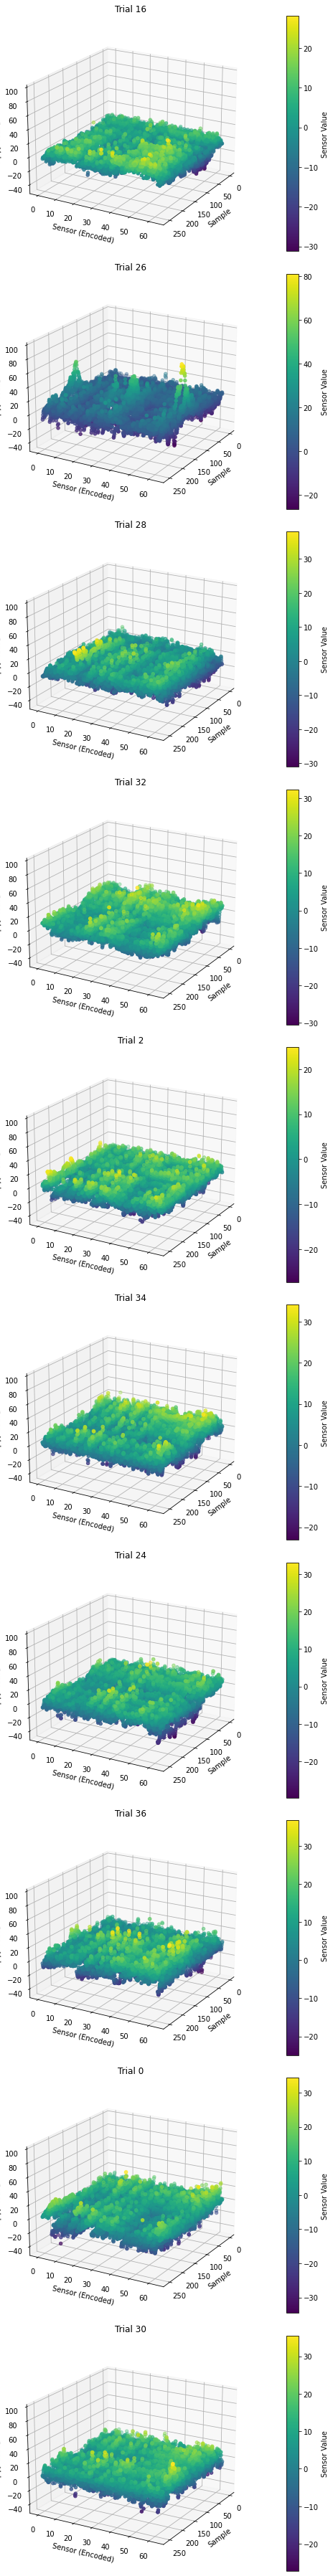

In [41]:
fig, axes = plt.subplots(nrows=len(ut), figsize=(15, 5*len(ut)), subplot_kw={'projection': '3d'})
for i, trial in enumerate(ut):
    trial_data = cdf[cdf['Trial'] == trial]
    ax = axes[i]
    ax.scatter(trial_data['Sample'], trial_data['Sensor'], trial_data['Sensor_Value'], c=trial_data['Sensor_Value'], cmap='viridis', marker='o')
    ax.set_xlabel('Sample')
    ax.set_ylabel('Sensor (Encoded)')
    ax.set_zlabel('Sensor Value')
    ax.set_title(f'Trial {trial}')
    cbar = plt.colorbar(ax.collections[-1], ax=ax)
    cbar.set_label('Sensor Value')
    ax.view_init(elev=20, azim=30)
    z_min = -50
    z_max = 100
    ax.set_zlim(z_min, z_max)
plt.tight_layout()
plt.show()

By comparing the plots of the alcoholic and the control subject, it is evident that the EEG signal for the alcoholic gives higher values in general (more spikes) as compared to the EEG signal of the control subject. The EEG signal for the control is comparatively flatter.

### Collating the large dataset
SMNI_CMI_TRAIN and SMNI_CMI_TEST contains trials of equal number of alcoholic and control subjects. The steps followed below are uncompressing and removing the zipped text files containing the EEG signal data; making separate datasets for easy of extraction for alcoholic and control subjects; labelling the alcoholic and control types; collating the whole data into a single dataframe without disrupting the order of the data as it is time series data

In [26]:
#Uncompressing the training dataset

main_folder_path = "/Users/deyachatterjee/Desktop/eeg+database/SMNI_CMI_TRAIN"
for subfolder in os.listdir(main_folder_path):
    subfolder_path = os.path.join(main_folder_path, subfolder)
    if os.path.isdir(subfolder_path):
        for file_name in os.listdir(subfolder_path):
            if file_name.endswith(".gz"):
                gz_file_path = os.path.join(subfolder_path, file_name)
                with gzip.open(gz_file_path, "rb") as gz:
                    uncompressed_file_path = gz_file_path[:-3]  # Remove ".gz" extension from the file name
                    with open(uncompressed_file_path, "wb") as f:
                        f.write(gz.read())             
                os.remove(gz_file_path)



In [27]:
#Uncompressing the test dataset

main_folder_path = "/Users/deyachatterjee/Desktop/eeg+database/SMNI_CMI_TEST"
for subfolder in os.listdir(main_folder_path):
    subfolder_path = os.path.join(main_folder_path, subfolder)
    if os.path.isdir(subfolder_path):
        for file_name in os.listdir(subfolder_path):
            if file_name.endswith(".gz"):
                gz_file_path = os.path.join(subfolder_path, file_name)
                with gzip.open(gz_file_path, "rb") as gz:
                    uncompressed_file_path = gz_file_path[:-3]  # Remove ".gz" extension from the file name
                    with open(uncompressed_file_path, "wb") as f:
                        f.write(gz.read())
                os.remove(gz_file_path)


In [40]:
#checking the data in one of the subfolders

folder_path = "/Users/deyachatterjee/Desktop/eeg+database/SMNI_CMI_TRAIN/co2c0000347"
rd_files = [file for file in os.listdir(folder_path) if file.startswith('co2c0000347.rd.')]
data = []
for rd_file in rd_files:
    full_path = os.path.join(folder_path, rd_file)
    with open(full_path, 'r') as f:
        lines = f.readlines()
        data.extend([line.strip().split() for line in lines if not line.startswith('#') and line.strip()])

columns = ['Trial', 'Sensor', 'Sample', 'Sensor_Value']
df = pd.DataFrame(data, columns=columns)
numeric_cols = ['Trial', 'Sample', 'Sensor_Value']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491520 entries, 0 to 491519
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Trial         491520 non-null  int64  
 1   Sensor        491520 non-null  object 
 2   Sample        491520 non-null  int64  
 3   Sensor_Value  491520 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 15.0+ MB
None


In [44]:
df.head()

,Trial,Sensor,Sample,Sensor_Value
0,29,FP1,0,-5.585
1,29,FP1,1,-5.585
2,29,FP1,2,-4.608
3,29,FP1,3,-3.632
4,29,FP1,4,-3.632


In [42]:
df['Trial'].unique()

array([14, 22, 71, 49, 47, 24, 23, 79, 77, 55, 30,  8,  1, 65, 53,  7,  0,
       31, 81, 75, 19, 26, 18, 29,  5,  2, 32, 61, 59, 57])

In [43]:
df['Sensor'].unique()

array(['FP1', 'FP2', 'F7', 'F8', 'AF1', 'AF2', 'FZ', 'F4', 'F3', 'FC6',
       'FC5', 'FC2', 'FC1', 'T8', 'T7', 'CZ', 'C3', 'C4', 'CP5', 'CP6',
       'CP1', 'CP2', 'P3', 'P4', 'PZ', 'P8', 'P7', 'PO2', 'PO1', 'O2',
       'O1', 'X', 'AF7', 'AF8', 'F5', 'F6', 'FT7', 'FT8', 'FPZ', 'FC4',
       'FC3', 'C6', 'C5', 'F2', 'F1', 'TP8', 'TP7', 'AFZ', 'CP3', 'CP4',
       'P5', 'P6', 'C1', 'C2', 'PO7', 'PO8', 'FCZ', 'POZ', 'OZ', 'P2',
       'P1', 'CPZ', 'nd', 'Y'], dtype=object)

In [45]:
len(df['Sample'].unique())

256

In [47]:
len(df['Sensor_Value'].unique())

9664

In [43]:
#control subjects
main_folder_path = "/Users/deyachatterjee/Desktop/eeg+database/SMNI_CMI_TRAIN"


data = []

for subfolder_number in range(337, 348):
    subfolder_path = os.path.join(main_folder_path, f"co2c0000{subfolder_number}")
    if os.path.exists(subfolder_path):
        rd_files = [file for file in os.listdir(subfolder_path) if file.startswith(f'co2c0000{subfolder_number}.rd.')]
        for rd_file in rd_files:
            full_path = os.path.join(subfolder_path, rd_file)
            with open(full_path, 'r') as f:
                lines = f.readlines()
                data.extend([line.strip().split() for line in lines if not line.startswith('#') and line.strip()])

# Create the DataFrame
columns = ['Trial', 'Sensor', 'Sample', 'Sensor_Value']
df = pd.DataFrame(data, columns=columns)
numeric_cols = ['Trial', 'Sample', 'Sensor_Value']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915200 entries, 0 to 4915199
Data columns (total 4 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Trial         int64  
 1   Sensor        object 
 2   Sample        int64  
 3   Sensor_Value  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 150.0+ MB
None


In [46]:
df['Type']=0

In [47]:
df.head(10)

,Trial,Sensor,Sample,Sensor_Value,Type
0,29,FP1,0,-5.585,0
1,29,FP1,1,-5.585,0
2,29,FP1,2,-4.608,0
3,29,FP1,3,-3.632,0
4,29,FP1,4,-3.632,0
5,29,FP1,5,-2.655,0
6,29,FP1,6,0.275,0
7,29,FP1,7,5.157,0
8,29,FP1,8,10.529,0
9,29,FP1,9,12.482,0


In [52]:
df['Trial'].unique()

array([ 29,  16,  27,  73,  87,  89,  26,  21,  28,  17,  43,  32,  67,
        51,   2,  34,  33,  83,  41,  24,  23,  47,  71,  25,  36,   0,
        53,  65,  30,  55,  12,  15,  14,  13,   9,   7,   6,   1,   8,
        37,  11,  18,  19,  10,  35,   4,   3,   5,  75,  20,  49,  22,
        77,  79,  39,  57, 107,  63,  97,  31,  61,  45,  81,  59])

In [53]:
df['Sensor'].unique()

array(['FP1', 'FP2', 'F7', 'F8', 'AF1', 'AF2', 'FZ', 'F4', 'F3', 'FC6',
       'FC5', 'FC2', 'FC1', 'T8', 'T7', 'CZ', 'C3', 'C4', 'CP5', 'CP6',
       'CP1', 'CP2', 'P3', 'P4', 'PZ', 'P8', 'P7', 'PO2', 'PO1', 'O2',
       'O1', 'X', 'AF7', 'AF8', 'F5', 'F6', 'FT7', 'FT8', 'FPZ', 'FC4',
       'FC3', 'C6', 'C5', 'F2', 'F1', 'TP8', 'TP7', 'AFZ', 'CP3', 'CP4',
       'P5', 'P6', 'C1', 'C2', 'PO7', 'PO8', 'FCZ', 'POZ', 'OZ', 'P2',
       'P1', 'CPZ', 'nd', 'Y'], dtype=object)

In [48]:
#alcoholic subjects
main_folder_path = "/Users/deyachatterjee/Desktop/eeg+database/SMNI_CMI_TRAIN"
data = []
for subfolder_number in range(364, 378):
    subfolder_path = os.path.join(main_folder_path, f"co2a0000{subfolder_number}")
    if os.path.exists(subfolder_path):
        rd_files = [file for file in os.listdir(subfolder_path) if file.startswith(f'co2a0000{subfolder_number}.rd.')]
        for rd_file in rd_files:
            full_path = os.path.join(subfolder_path, rd_file)
            with open(full_path, 'r') as f:
                lines = f.readlines()
                data.extend([line.strip().split() for line in lines if not line.startswith('#') and line.strip()])
columns = ['Trial', 'Sensor', 'Sample', 'Sensor_Value']
df1 = pd.DataFrame(data, columns=columns)
numeric_cols = ['Trial', 'Sample', 'Sensor_Value']
df1[numeric_cols] = df1[numeric_cols].apply(pd.to_numeric)

print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4423680 entries, 0 to 4423679
Data columns (total 4 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Trial         int64  
 1   Sensor        object 
 2   Sample        int64  
 3   Sensor_Value  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 135.0+ MB
None


In [49]:
df1['Type']=1

In [50]:
df1.head()

,Trial,Sensor,Sample,Sensor_Value,Type
0,15,FP1,0,-1.984,1
1,15,FP1,1,-0.031,1
2,15,FP1,2,2.899,1
3,15,FP1,3,4.852,1
4,15,FP1,4,4.852,1


In [51]:
ldf = pd.concat([df, df1], ignore_index=True) #entire large training dataset

In [52]:
ldf.head()

,Trial,Sensor,Sample,Sensor_Value,Type
0,29,FP1,0,-5.585,0
1,29,FP1,1,-5.585,0
2,29,FP1,2,-4.608,0
3,29,FP1,3,-3.632,0
4,29,FP1,4,-3.632,0


In [53]:
ldf['Type'].dtype

dtype('int64')

In [54]:
ldf.isnull().sum()

Trial           0
Sensor          0
Sample          0
Sensor_Value    0
Type            0
dtype: int64

In [55]:
# preparing the test dataset

#control subjects- test data
main_folder_path = "/Users/deyachatterjee/Desktop/eeg+database/SMNI_CMI_TEST"


data = []

for subfolder_number in range(337, 348):
    subfolder_path = os.path.join(main_folder_path, f"co2c0000{subfolder_number}")
    if os.path.exists(subfolder_path):
        rd_files = [file for file in os.listdir(subfolder_path) if file.startswith(f'co2c0000{subfolder_number}.rd.')]
        for rd_file in rd_files:
            full_path = os.path.join(subfolder_path, rd_file)
            with open(full_path, 'r') as f:
                lines = f.readlines()
                data.extend([line.strip().split() for line in lines if not line.startswith('#') and line.strip()])
columns = ['Trial', 'Sensor', 'Sample', 'Sensor_Value']
df0 = pd.DataFrame(data, columns=columns)
numeric_cols = ['Trial', 'Sample', 'Sensor_Value']
df0[numeric_cols] = df0[numeric_cols].apply(pd.to_numeric)

print(df0.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915200 entries, 0 to 4915199
Data columns (total 4 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Trial         int64  
 1   Sensor        object 
 2   Sample        int64  
 3   Sensor_Value  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 150.0+ MB
None


In [56]:
df0['Type']=0           

In [57]:
df0.head()

,Trial,Sensor,Sample,Sensor_Value,Type
0,107,FP1,0,7.579,0
1,107,FP1,1,5.625,0
2,107,FP1,2,1.719,0
3,107,FP1,3,-1.211,0
4,107,FP1,4,-2.187,0


In [58]:
#alcoholic subjects - test data
main_folder_path = "/Users/deyachatterjee/Desktop/eeg+database/SMNI_CMI_TEST"


data = []

for subfolder_number in range(364, 379):
    subfolder_path = os.path.join(main_folder_path, f"co2a0000{subfolder_number}")
    if os.path.exists(subfolder_path):
        rd_files = [file for file in os.listdir(subfolder_path) if file.startswith(f'co2a0000{subfolder_number}.rd.')]
        for rd_file in rd_files:
            full_path = os.path.join(subfolder_path, rd_file)
            with open(full_path, 'r') as f:
                lines = f.readlines()
                data.extend([line.strip().split() for line in lines if not line.startswith('#') and line.strip()])
columns = ['Trial', 'Sensor', 'Sample', 'Sensor_Value']
df2 = pd.DataFrame(data, columns=columns)
numeric_cols = ['Trial', 'Sample', 'Sensor_Value']
df2[numeric_cols] = df2[numeric_cols].apply(pd.to_numeric)

print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915200 entries, 0 to 4915199
Data columns (total 4 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Trial         int64  
 1   Sensor        object 
 2   Sample        int64  
 3   Sensor_Value  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 150.0+ MB
None


In [59]:
df2['Type']=1

In [60]:
df2.head()

,Trial,Sensor,Sample,Sensor_Value,Type
0,103,FP1,0,-0.692,1
1,103,FP1,1,-5.086,1
2,103,FP1,2,-8.993,1
3,103,FP1,3,-11.922,1
4,103,FP1,4,-10.946,1


In [61]:
tdf = pd.concat([df0, df2], ignore_index=True) #entire large test dataset
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9830400 entries, 0 to 9830399
Data columns (total 5 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Trial         int64  
 1   Sensor        object 
 2   Sample        int64  
 3   Sensor_Value  float64
 4   Type          int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 375.0+ MB


In [63]:
tdf.isnull().sum()

Trial           0
Sensor          0
Sample          0
Sensor_Value    0
Type            0
dtype: int64

In [64]:
total_df =pd.concat([ldf, tdf], ignore_index=True)

In [65]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19169280 entries, 0 to 19169279
Data columns (total 5 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Trial         int64  
 1   Sensor        object 
 2   Sample        int64  
 3   Sensor_Value  float64
 4   Type          int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 731.3+ MB


In [66]:
total_df.head()

,Trial,Sensor,Sample,Sensor_Value,Type
0,29,FP1,0,-5.585,0
1,29,FP1,1,-5.585,0
2,29,FP1,2,-4.608,0
3,29,FP1,3,-3.632,0
4,29,FP1,4,-3.632,0


In [67]:
#Storing the training data to a csv file

dir_path = "/Users/deyachatterjee/Desktop"
file_name = "EEG_data.csv"
file_path = os.path.join(dir_path, file_name)
total_df.to_csv(file_path, index=False)

## Visualization of our final dataset

In [104]:
import plotly.express as px
subset_df = total_df.sample(n=1000, random_state=42)
fig = px.scatter_3d(subset_df, x='Sample', y='Sensor', z='Sensor_Value', color='Type')
fig.update_layout(title='Interactive 3D Scatter Plot of Subset EEG Data')
fig.show()

This interactive plot shows samples of data from our entire dataset. The blue balls represent Type=0 i.e. control subjects and the yellow balls represent Type=1 i.e. alcoholic subjects. The plot indicates that our data has an almost equal mix of alcoholic and control subjects.

## Feature Calculation

In [68]:
import numpy as np
from scipy.stats import skew, kurtosis

In [69]:
def calculate_features(df, window_size):
    mean_values = []
    median_values = []
    variance_values = []
    skewness_values = []
    kurtosis_values = []
    types = []  # New list to store 'Type' values
    
    for i in range(0, len(df), window_size):
        window_data = df.iloc[i:i+window_size]

        mean_values.append(window_data['Sensor_Value'].mean())
        median_values.append(window_data['Sensor_Value'].median())
        variance_values.append(window_data['Sensor_Value'].var())
        skewness_values.append(skew(window_data['Sensor_Value']))
        kurtosis_values.append(kurtosis(window_data['Sensor_Value']))
        type_value = window_data.iloc[-1]['Type']
        types.append(type_value)

    features_df = pd.DataFrame({
        'Mean': mean_values,
        'Median': median_values,
        'Variance': variance_values,
        'Skewness': skewness_values,
        'Kurtosis': kurtosis_values,
        'Type': types  
    })

    return features_df


In [70]:
features=calculate_features(total_df,100)

In [71]:
features.shape

(191693, 6)

In [72]:
features.head()

,Mean,Median,Variance,Skewness,Kurtosis,Type
0,0.48955,1.251,26.097654,0.029090,-0.829155,0
1,-11.16088,-11.444,25.369652,0.117472,-0.377222,0
2,-10.43341,-10.468,190.167372,-0.127056,-1.465123,0
3,-6.61012,-7.538,42.896356,0.002115,-0.947173,0
4,-20.04271,-18.036,65.446278,-0.574221,-0.849269,0


In [73]:
#Using Fast Fourier Transform (FFT)
import numpy as np

def extract_spectral_features_fft(eeg_data):
    sampling_freq = 1.0 / np.mean(np.diff(eeg_data['Sample']))
    fft_values = np.fft.fft(eeg_data['Sensor_Value'])
    frequencies = np.fft.fftfreq(len(eeg_data), d=1.0 / sampling_freq)
    spectral_features = []
    for channel in eeg_data['Sensor'].unique():
        channel_data = eeg_data[eeg_data['Sensor'] == channel]['Sensor_Value']
        channel_fft = np.fft.fft(channel_data)
        channel_freqs = np.fft.fftfreq(len(channel_data), d=1.0 / sampling_freq)
        dominant_freq = np.abs(channel_freqs[np.argmax(np.abs(channel_fft))])
        spectral_power = np.sum(np.abs(channel_fft) ** 2)

        spectral_features.append({
            'Sensor': channel,
            'Dominant_Frequency': dominant_freq,
            'Spectral_Power': spectral_power
        })

    spectral_features_df = pd.DataFrame(spectral_features)

    return spectral_features_df


In [74]:
spectral_features=extract_spectral_features_fft(total_df)

In [75]:
spectral_features.shape

(64, 3)

In [76]:
spectral_features.head()

,Sensor,Dominant_Frequency,Spectral_Power
0,FP1,293.647044,4.116461e+13
1,FP2,293.647044,1.600772e+13
2,F7,0.000000,1.090287e+13
3,F8,0.000000,1.169783e+13
4,AF1,0.000000,8.114402e+12


In [80]:
spectral_features = spectral_features.merge(total_df[['Sensor', 'Type']], on='Sensor', how='left')
spectral_features.head()

,Sensor,Dominant_Frequency,Spectral_Power,Type
0,FP1,293.647044,4.116461e+13,0
1,FP1,293.647044,4.116461e+13,0
2,FP1,293.647044,4.116461e+13,0
3,FP1,293.647044,4.116461e+13,0
4,FP1,293.647044,4.116461e+13,0


In [85]:
label_encoder = LabelEncoder()
spectral_features['Sensor'] = label_encoder.fit_transform(spectral_features['Sensor'])
spectral_features.head()

,Sensor,Dominant_Frequency,Spectral_Power,Type
0,34,293.647044,4.116461e+13,0
1,34,293.647044,4.116461e+13,0
2,34,293.647044,4.116461e+13,0
3,34,293.647044,4.116461e+13,0
4,34,293.647044,4.116461e+13,0


In [ ]:
X = spectral_features.drop('Type', axis=1)
model = IsolationForest(contamination=0.1, random_state=42)  
model.fit(X)
predictions = model.predict(X)
anomaly_scores = model.decision_function(X)
spectral_features['Anomaly'] = predictions
spectral_features['Anomaly_Score'] = anomaly_scores
print(spectral_features)

Even though I could extract the features, the above lines of code, where I use the spectral features to train an Isolation Forest model, are taking too long to run, hence could not use these features for model training.

## Model selection and training

In [87]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

In [88]:
X = features.drop('Type', axis=1)
y = features['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Using the statistical features to train our models

In [140]:
# Isolation Forest
model = IsolationForest(contamination=0.1, random_state=42)
model.fit(X_train)
y_pred = model.predict(X_test)
y_pred_binary = [1 if pred == -1 else 0 for pred in y_pred]
print("Accuracy:", accuracy)
print(confusion_matrix(y_test, y_pred_binary))
print(classification_report(y_test, y_pred_binary))

Accuracy: 0.4883799786118574
[[17381  2154]
 [17180  1624]]
              precision    recall  f1-score   support

           0       0.50      0.89      0.64     19535
           1       0.43      0.09      0.14     18804

    accuracy                           0.50     38339
   macro avg       0.47      0.49      0.39     38339
weighted avg       0.47      0.50      0.40     38339



In [139]:
# One class SVM
X = features.drop('Type', axis=1)  
y = features['Type'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ocsvm_model = OneClassSVM(nu=0.1, kernel='rbf', gamma='auto') 
ocsvm_model.fit(X_train)
y_pred = ocsvm_model.predict(X_test)
y_pred_binary = [1 if pred == -1 else 0 for pred in y_pred]
accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
classification_rep = classification_report(y_test, y_pred_binary)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.4883799786118574
Confusion Matrix:
 [[16997  2538]
 [17077  1727]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.87      0.63     19535
           1       0.40      0.09      0.15     18804

    accuracy                           0.49     38339
   macro avg       0.45      0.48      0.39     38339
weighted avg       0.45      0.49      0.40     38339



In [138]:
# Local Outlier Factor
X = features.drop('Type', axis=1)  
y = features['Type']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lof_model = LocalOutlierFactor(n_neighbors=20, contamination=0.1)  
y_pred = lof_model.fit_predict(X_train)
y_pred_binary = [1 if pred == -1 else 0 for pred in y_pred]
y_test_pred = lof_model.fit_predict(X_test)
y_test_pred_binary = [1 if pred == -1 else 0 for pred in y_test_pred]
accuracy = accuracy_score(y_test, y_test_pred_binary)
conf_matrix = confusion_matrix(y_test, y_test_pred_binary)
classification_rep = classification_report(y_test, y_test_pred_binary)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.5116200213881427
Confusion Matrix:
 [[17658  1877]
 [16847  1957]]
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.90      0.65     19535
           1       0.51      0.10      0.17     18804

    accuracy                           0.51     38339
   macro avg       0.51      0.50      0.41     38339
weighted avg       0.51      0.51      0.42     38339



In [95]:
from pyod.models.cblof import CBLOF
from sklearn.preprocessing import StandardScaler
X = features.drop('Type', axis=1)
y = features['Type']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
cblof_model = CBLOF(contamination=0.02) 
cblof_model.fit(X_scaled)
y_pred = cblof_model.predict(X_scaled)
features['CBLOF_Outlier'] = y_pred
print(features)


            Mean  Median    Variance  Skewness  Kurtosis  Type  CBLOF_Outlier
0        0.48955   1.251   26.097654  0.029090 -0.829155     0              0
1      -11.16088 -11.444   25.369652  0.117472 -0.377222     0              0
2      -10.43341 -10.468  190.167372 -0.127056 -1.465123     0              0
3       -6.61012  -7.538   42.896356  0.002115 -0.947173     0              0
4      -20.04271 -18.036   65.446278 -0.574221 -0.849269     0              0
...          ...     ...         ...       ...       ...   ...            ...
191688   0.93670   1.200   50.711241  0.146725 -1.219955     1              0
191689  -7.73031  -9.054   48.946821  0.388162 -1.129915     1              0
191690   0.30844   0.264   11.454199 -0.133079 -0.293659     1              0
191691 -10.94644 -16.337  200.608544  0.714166 -0.831569     1              0
191692 -13.42570 -11.210   90.269545 -0.226564 -1.205711     1              0

[191693 rows x 7 columns]


In [96]:
from sklearn.metrics import roc_auc_score
true_labels = features['Type']
predicted_outliers = features['CBLOF_Outlier']
print("Classification Report:")
print(classification_report(true_labels, predicted_outliers))
print("\nConfusion Matrix:")
print(confusion_matrix(true_labels, predicted_outliers))
auc_roc = roc_auc_score(true_labels, predicted_outliers)
print(f"\nAUC-ROC Score: {auc_roc}")

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.98      0.67     98304
           1       0.54      0.02      0.04     93389

    accuracy                           0.51    191693
   macro avg       0.53      0.50      0.36    191693
weighted avg       0.53      0.51      0.37    191693


Confusion Matrix:
[[96553  1751]
 [91306  2083]]

AUC-ROC Score: 0.5022462304852894


In [97]:
false_positives = features[(features['Type'] == 0) & (features['CBLOF_Outlier'] == 1)]
false_negatives = features[(features['Type'] == 1) & (features['CBLOF_Outlier'] == 0)]
print(false_positives)
print("\nFalse Negatives:")
print(false_negatives)

            Mean   Median    Variance  Skewness   Kurtosis  Type  \
40     -36.01192 -33.1930  175.303766  0.195063  -0.223130     0   
57      -7.40313  -7.8330    6.841090  1.705116   4.923241     0   
87       0.35888   1.4850   39.935385 -3.032480  10.649343     0   
360     -3.88718  -3.4790   17.858112  2.034519   9.560534     0   
471     -3.05012  -2.2380   29.841564 -3.516715  14.177050     0   
...          ...      ...         ...       ...        ...   ...   
141941   3.35286   4.2930   18.218357 -2.039378   5.534692     0   
142100  -1.04048  -1.3940   11.081714 -1.072032   4.054292     0   
142182  -1.43067  -1.0275    9.002844 -2.916085  11.575806     0   
142510   0.15872  -1.4850   30.759812  1.871692   3.512104     0   
142535  -0.64826  -1.1140   14.641847  1.284697   3.805049     0   

        CBLOF_Outlier  
40                  1  
57                  1  
87                  1  
360                 1  
471                 1  
...               ...  
141941         

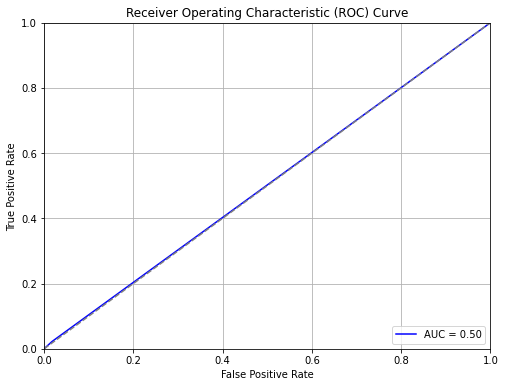

In [99]:
from sklearn.metrics import roc_curve
true_labels = features['Type']
predicted_outliers = features['CBLOF_Outlier']

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(true_labels, predicted_outliers)

# Calculate the false positive rate (fpr), true positive rate (tpr), and threshold values
fpr, tpr, thresholds = roc_curve(true_labels, predicted_outliers)

# Plot the AUC-ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

As ROC curve is the diagonal of the ROC space, it means that the classifier's performance is equivalent to random guessing. The accuracy scores for all the models are also around 50. So the classifiers are not able to discriminate between the positive and negative classes effectively. I will now try hyperparameter tuning and check if the results improve.

### Hyperparameter tuning on LOF

In [92]:
X = features.drop('Type', axis=1)
y = features['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
param_grid = {
    'n_neighbors': [5, 10, 15, 20],  
    'contamination': [0.1, 0.2, 0.3] }
lof = LocalOutlierFactor()
grid_search = GridSearchCV(lof, param_grid, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
lof_model = LocalOutlierFactor(n_neighbors=best_params['n_neighbors'], contamination=best_params['contamination'])
lof_model.fit(X_train)
y_test_pred = lof_model.fit_predict(X_test)
y_test_pred_binary = [1 if pred == -1 else 0 for pred in y_test_pred]
accuracy = accuracy_score(y_test, y_test_pred_binary)
print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_score)
print("Accuracy on Test Data:", accuracy)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_lof.py", line 325, in predict
    raise At

Best Parameters: {'contamination': 0.1, 'n_neighbors': 5}
Best Accuracy Score: nan
Accuracy on Test Data: 0.506403401236339


In [93]:
#Training on LOF on best parameters : Best Parameters: {'contamination': 0.1, 'n_neighbors': 5}
X = features.drop('Type', axis=1)  
y = features['Type']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lof_model = LocalOutlierFactor(n_neighbors=5, contamination=0.1)  
y_pred = lof_model.fit_predict(X_train)
y_pred_binary = [1 if pred == -1 else 0 for pred in y_pred]
y_test_pred = lof_model.fit_predict(X_test)
y_test_pred_binary = [1 if pred == -1 else 0 for pred in y_test_pred]
accuracy = accuracy_score(y_test, y_test_pred_binary)
conf_matrix = confusion_matrix(y_test, y_test_pred_binary)
classification_rep = classification_report(y_test, y_test_pred_binary)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.506403401236339
Confusion Matrix:
 [[17558  1977]
 [16947  1857]]
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.90      0.65     19535
           1       0.48      0.10      0.16     18804

    accuracy                           0.51     38339
   macro avg       0.50      0.50      0.41     38339
weighted avg       0.50      0.51      0.41     38339



Even after hyperparameter tuning the model performance does not improve.